In [1]:
!pip install opencv-python

In [38]:
import cv2
import matplotlib.pyplot as plt

In [3]:
#이미지 읽기
# img_bgr = cv2.imread('test.png')

#open cv는 BGR 사용 -> RGB로 변환
img_rgb = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)

NameError: name 'img_brg' is not defined

In [ ]:
image = cv2.imread('cat.jpg', cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("cat")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_image, cmap = 'gray')
plt.title("gray_cat")
plt.axis('off')



In [ ]:
# 이미지 전처리 
# 노이즈 제거 ->이미지 데이터가 더 균일해지므로 압축 효율이 좋아지고, 데이터 전송 시 불필요한 정보가 줄어듬

In [4]:
def show(image1, image2):
    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.axis('off')


#평균 블러
blurred = cv2.blur(image, (21,21))
show(image,blurred)



NameError: name 'image' is not defined

In [36]:
#image n장 출력 함수
def show_n (images, title=None, gray=True):
    n = len(images)
    for i, image in enumerate(images):
        plt.subplot(1,n,(i+1))
        
        if gray:
            plt.imshow (image, cmap = 'gray')
        else:
            plt.imshow(image)

        if title:
            plt.title(title[i])
        
        plt.axis('off')
    
    plt.tight_layout


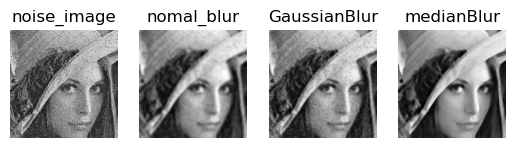

In [7]:
noise_image = cv2.imread('open_cv_pic/noise.webp', cv2.IMREAD_GRAYSCALE)

blurred = cv2.blur(noise_image, (7,7))              #이미지, K사이즈
g_blurred = cv2.GaussianBlur(noise_image, (7,7),0)  #이미지, K사이즈(넓이, 높이)(홀수), X방향표준편차)
m_blurred = cv2.medianBlur(noise_image, (7))      #이미지, K사이즈
                        # ksize : 평균 필터 크기 (너비 방향 필터 크기, 높이 방향 필터 크기) → 무조건 홀수로 지정해됨


show_n([noise_image, blurred, g_blurred, m_blurred],
      title=['noise_image','nomal_blur','GaussianBlur','medianBlur']
      )
#아래 사진 보면 알다시피 노이즈 제거에 제일 좋은것은 median블러다
#

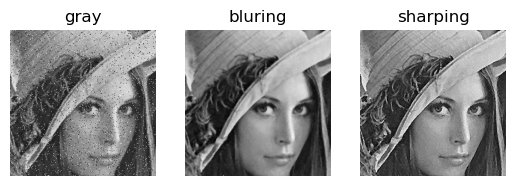

In [35]:
import numpy as np 

#실습 3
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

gray = cv2.imread('open_cv_pic/noise.webp', cv2.IMREAD_GRAYSCALE)
bluring = cv2.medianBlur(noise_image, (3))
sharping = cv2.filter2D(bluring, -1, kernel)

show_n([gray, bluring, sharping],
      title=['gray', 'bluring', 'sharping']
      )

In [ ]:
# TypeError: 'list' object is not callable 이 뜬 이유
# 내가 실수로 np.array = ([[0, -1, 0],
#                   [-1, 5, -1],
#                   [0, -1, 0]])
# 이렇게 해서 함수를 변수로 만들어 버렸다.

#해결 방법 커널 리스타트.....

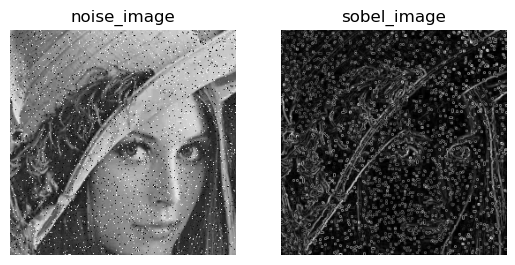

In [34]:
def sobel (image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 3)
    result = cv2.magnitude(sobel_x, sobel_y)
    return result

noise_image = cv2.imread('open_cv_pic/noise.webp', cv2.IMREAD_GRAYSCALE)
sobel_image = sobel(noise_image)
show_n([noise_image, sobel_image],
      ['noise_image', 'sobel_image']
      )

# 흙백으로 읽어야한다 ( 소벨은 읽을때 가장 첫번째 값을 본다 => 흑백이면 밝이로 윤곽을 확실하게 따는데, 
#                      컬러면 RED값의 변화로 윤곽을 알게 되어 제대로 동작하지 않게 된다.)
# 이 사진을 보면 노이즈때문에 제대로된 윤곽이 보이지 안헥 된다.
# 샤프닝을 하여 엣지를 강조 하여 윤곽을 보다 확실하게 잡을수 있게 해주는것이 좋다.

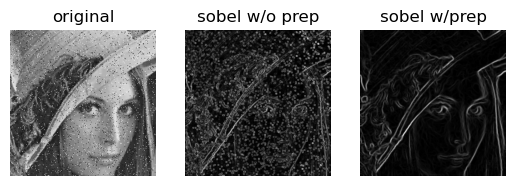

In [10]:
# 실습 5 
# sobel 엣지검출을 하기전에 
# • 전처리(노이즈 제거, 샤프닝)을 하고 엣지를 검출하시요
# • 노이즈 제거는 medianBlur, k값은 5를 사용하시요
# • 원래 이미지, 엣지검출 (w/o 전처리), 엣지검출 (w/ 전처리) 를 출력하시요

m_blurred = cv2.medianBlur(noise_image, (5))



original = noise_image
sobel_wo_prep = sobel_image
sobel_w_prep = sobel(m_blurred)

show_n([original, sobel_wo_prep, sobel_w_prep],
      title=['original', 'sobel w/o prep', 'sobel w/prep']
      )

In [33]:
def lap(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def can(image):
    return cv2.Canny(image, 100, 200) # 뒤에 두 숫자는 엣지의 밝기의 범위를 나타내준다

In [ ]:
#엣지 검출 비교

noise_image = cv2.imread('')

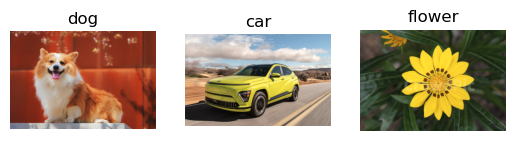

In [20]:
dog = cv2.imread('open_cv_pic/dog.png')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

car = cv2.imread('open_cv_pic/car.png')
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)

flower = cv2.imread('open_cv_pic/flower.png')
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)

gray_dog = cv2.imread('open_cv_pic/dog.png',cv2.IMREAD_GRAYSCALE)
burr_d = cv2.medianBlur(dog, (3))
sharp_d = cv2.filter2D(burr_d, -1, kernel)

gray_car = cv2.imread('open_cv_pic/car.png',cv2.IMREAD_GRAYSCALE)
burr_c = cv2.medianBlur(car, (3))
sharp_c = cv2.filter2D(burr_c, -1, kernel)

gray_flower = cv2.imread('open_cv_pic/flower.png',cv2.IMREAD_GRAYSCALE)
burr_f = cv2.medianBlur(flower, (3))
sharp_f = cv2.filter2D(burr_f, -1, kernel)

a = show_n([dog, car, flower],
          title=['dog', 'car', 'flower']
          )

# b = show_n([can(sharp_d), can(sharp_c), can(sharp_f)],
#           title=['dog_edge', 'car_edge', 'flower_edge']
#           )


#함수 마렵네....

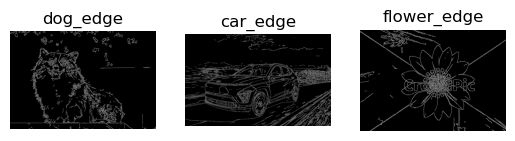

In [22]:
b = show_n([can(sharp_d), can(sharp_c), can(sharp_f)],
          title=['dog_edge', 'car_edge', 'flower_edge']
          )


In [ ]:
# 케니를 한 이유는 형태를 찾기 위해서지, 컨투어 하려고 하는게 아니다.

In [24]:
# 컨투어 탐지

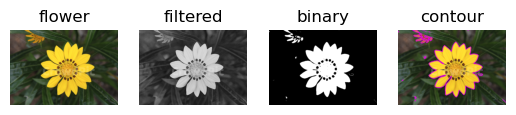

In [41]:
#flower 외곽선 찾기

flower = cv2.imread('open_cv_pic/flower.png')
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)

#1. filtering - 흑&백 변환, 노이즈 제거(blur), 샤프닝(sharpning)
# def filtering(name):
#     filtered = cv2.cvtColor(name, cv2.COLOR_RGB2GRAY)
#     filtered = cv2.medianBlur(filtered, 7)
#     filtered = cv2.filter2D(filtered, -1, kernel)
#     return filtered

# filtering(flower)

filtered = cv2.cvtColor(flower, cv2.COLOR_RGB2GRAY)
filtered = cv2.medianBlur(filtered, 7)
filtered = cv2.filter2D(filtered, -1, kernel)



# 2. 이진화
_, binary = cv2.threshold(filtered, 120, 255, cv2.THRESH_BINARY) # _는 변수로 첫번째 값 상관 없어서 임시로 만든거 뿐임
 # 120, 225  = 각각의 밝기가 120이 넘으면, 255로 바꾸어 줘라, 만약 아니면 0으로 만들어서 안보이게 해라 라는 뜻이다
 # 0은 밝기 0 = 검은색, 255는 밝기 최대 = 흰색

# 3. 외곽선 찾기
results, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour = np.ones(flower.shape, dtype=flower.dtype)
contour = flower.copy()
cv2.drawContours(contour, results, -1, (225, 0, 225), 4) # drawContours 메소드 : 첫번째 인자로 그릴 위치 지정
                                                            # 
                                                            #

show_n([flower, filtered, binary, contour],
        ['flower', 'filtered', 'binary', 'contour']
       )        

In [43]:
for i, result in enumerate(results): # i는 없어도 된다  
    area = cv2.contourArea(result)   # contourArea는외곽선이 감싸는 영역의 면적을 반환 하는 함수
    if area > 0:
        print(i, area)

9 60.0
20 11.5
28 65.0
29 72938.0
37 223.0
40 30.0
49 8.5
56 2329.5


In [ ]:
max_area = 0
max_cont = None
for i, result in enumerate(results): # results 리스트 안에 있는 모든 윤곽선(result)을 하나씩 꺼내 순회
    area = cv2.contourArea(result) # 윤곽선의 면적을 계산
    if max_area < area: # 계산한 윤곽선의 면적(area)이 최대 면적 보다 크면
        max_area = area # 최대 면적을 계산한 면적으로 바꿈(갱신함)
        max_cont = result #

contour = flower.copy()
contour = cv2.drawContours(contour, [max_cont], -1, (255, 0, 255), 4)  # drawContours

# cv2.drawContours

# 첫 번째 인자에 그릴 이미지(contour),

# 두 번째 인자에 윤곽선들의 리스트 (여기서는 가장 큰 윤곽선 하나만 리스트에 담음),

# 세 번째 인자 -1 은 그 리스트의 모든 윤곽선을 그리라는 의미(리스트가 1개짜리라 1개를 그리게 됨),

# (255, 0, 255) 는 핑크빛(magenta) 컬러 (BGR 순),

# 4 는 선 두께(픽셀 단위)




show([flower, contour],
     ['flower', 'contour'])

## 오늘 배운거 정리

Matplotlib : RGB 형식 사용 -> [[R값],[G값], [B값]], 간단한 이미지 표시만 가능
OpenCV : BGR 형식 사용 -> [[B값],[G값], [R값]], 다중 이미지 비교, 축 조정, 제목 설정등 가능

Matplotlib 함수
imshow(데이터, [옵션])

원하는 사물 인식을 하기 위해선 전처리 과정이 필요
전처리 = 그레이 스케일을 사용하여 사진 흑백으로 만들기 -> blur를 사용하여 노이즈 제거 -> 샤프닝으로 엣지(경계선) 강조 
이 3단계를 거친다.


2. 노이즈 제거 = blur 처리
    샤프닝 = 엣지 강조
   사진 흑백 만들기 = 그레이 스케일 

3.  여러 사진을 비교 하고 싶으면 subplot

#image n장 출력 함수
def show_n (images, title=None, gray=True):  images  불러올 사진 파일, title=None 전체 필롯의 타이틀 없앰,                                                         gray=True      Matplotlib에서 gray_scale은 초록색으로 나온다. 
                                                                            이를 방지하기 위해서 사용하는것
   
    n = len(images)                          이미지 개수 만큼 열을 지정해 주는것          
    
    for i, image in enumerate(images):      
        plt.subplot(1,n,(i+1))               1행 n열 i+1 번째에 사진 넣는거 ( i = 인덱스 임으로 0부터 시작)
        
        if gray:                               if gray = 
            plt.imshow (image, cmap = 'gray')    cmap : 컬러 맵. 이미지 데이터를 색상으로 변환하는 데 사용. 
                                                                    ('gray', 'viridis', 'hot’)
        else:
            plt.imshow(image)

        if title:
            plt.title(title[i])
        
        plt.axis('off')
    
    plt.tight_layout
